# Visualização dos dados de vacinação

## Tratamento dos Dados

In [21]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import fix_vaxs
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style = "ticks", rc = custom_params)

import plotly.io as pio
pio.renderers.default = "vscode"

In [22]:
vax_df = pd.read_csv("datasets/dados_vacinacao.csv")
casos_df = pd.read_csv('datasets/dados_pb.csv')

Renomearemos as categorias de vacina e a descrição do tipo de dose para facilitar a leitura e remoção de duplicidade de códigos para o mesmo fabricante e mesmo tipo de dose. 

In [23]:
fix_vaxs.rename_vax(vax_df)
fix_vaxs.rename_doses(vax_df)
fix_vaxs.update_vax_code(vax_df)

In [24]:
vax_df.head(5)

,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_nmMunicipio,paciente_endereco_cep,estabelecimento_municipio_nome,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,paciente_id
0,44,1977-04-18,M,1,BRANCA,ARAPIRACA,57510,PATOS,912,Médico,9,Trabalhadores de Saúde,2021-11-11,Reforço,87,PFIZER,f9495cb04daf5adb495d22c9c88b31883f191fb762ab27...
1,5,2016-11-18,M,1,BRANCA,PARELHAS,None,CAMPINA GRANDE,207,Pessoas de 5 a 11 anos,0,NaN,2022-02-07,1ª Dose,99,PFIZER PEDIÁTRICA,52288faace8c986872faca7101868ae8a23fefd435cd51...
2,39,1982-01-23,F,99,SEM INFORMACAO,CAMPINA GRANDE,58410,CAMPINA GRANDE,201,Pessoas de 18 a 64 anos,2,Faixa Etária,2021-07-16,1ª Dose,85,ASTRAZENECA,0ffaed327aac7fe8abf0b35471b0b1fa60f9fc48ff7d9c...
3,33,1988-07-20,M,2,PRETA,BAYEUX,58110,BAYEUX,201,Pessoas de 18 a 64 anos,2,Faixa Etária,2021-07-23,1ª Dose,85,ASTRAZENECA,fe78cee14dce3436024728b1d760439861021207a32712...
4,27,1994-03-22,M,3,PARDA,JOAO PESSOA,58058,JOAO PESSOA,201,Pessoas de 18 a 64 anos,2,Faixa Etária,2021-12-07,2ª Dose,87,PFIZER,470944c18359d6a1fea2a53194d29bfdb7ce1d21b47979...


## Visualização dos dados:

### Vacinação por tipo de dose

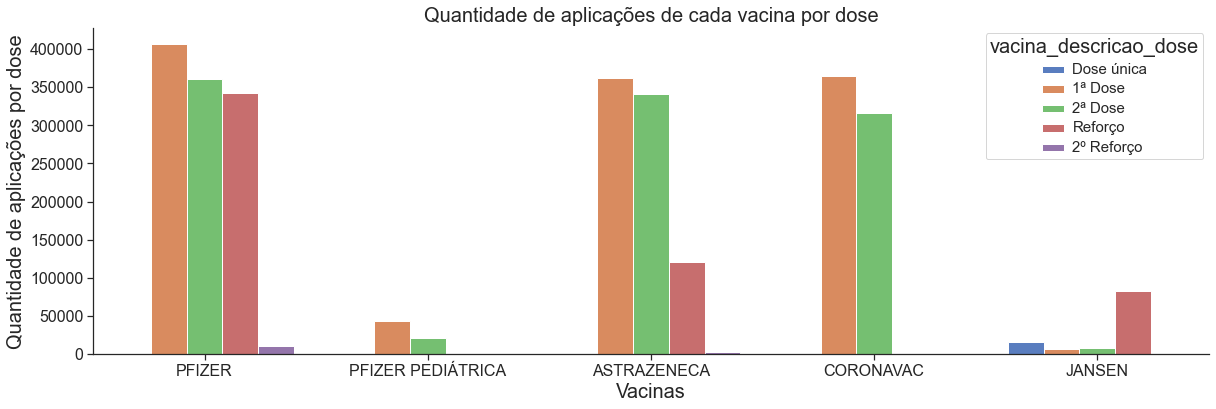

In [25]:
ax = sns.countplot(
    data = vax_df, x = 'vacina_nome',
    hue = 'vacina_descricao_dose',
    hue_order = ['Dose única', '1ª Dose', '2ª Dose', 'Reforço', '2º Reforço'], palette = 'muted'
    )
    
plt.setp(ax.get_legend().get_title(), fontsize = '20')
plt.setp(ax.get_legend().get_texts(), fontsize = '15')

ax.set_xlabel('Vacinas', fontsize = 20)
ax.set_ylabel('Quantidade de aplicações por dose', fontsize=20)
ax.set_title('Quantidade de aplicações de cada vacina por dose', fontsize=20)
ax.figure.set_size_inches(20, 6)
ax.tick_params(labelsize = 16)

Verificamos pelo gráfico que a vacina mais aplicada na Paraíba durante o período analisado foi a Pfizer, para a primeira dose, segunda e terceira doses. Tal observação contrasta com o cenário nacional, tendo em vista que a vacina mais utilizada no país durante a campanha de COVID-19 foi a Astrazeneca, segundo dados do Ministério da Saúde, [consulte essa referência](https://www.gov.br/saude/pt-br/assuntos/noticias/2022/janeiro/saiba-a-quantidade-de-doses-de-vacinas-covid-19-aplicadas-ate-o-momento-no-brasil-por-fabricante#:~:text=E%20tem%20mais%20not%C3%ADcia%20boa,milh%C3%B5es%20foram%20produzidas%20pela%20Janssen).

Constata-se que a Jansen foi a fabricante que mais aplicou doses únicas.

### Vacinação por etnia

In [26]:
vax_df['paciente_racaCor_valor'].value_counts()

PARDA             1040425
BRANCA             664898
AMARELA            593652
SEM INFORMACAO     391266
PRETA              105218
INDIGENA            11331
Name: paciente_racaCor_valor, dtype: int64

In [27]:
ethinicities_vax_list = ['Amarela', 'Branca', 'Parda', 'Preta', 'Sem informação', 'Indígena']
ethinicities_vax_value_counts_list = [593652, 664898, 1040425, 105218, 391266, 11331]

fig = go.Figure(data=[go.Pie(labels = ethinicities_vax_list, values = ethinicities_vax_value_counts_list, hole=.3)])
fig.update_layout(title = 'Vacinação por etnia na Paraíba')
fig.show()

O primeiro gráfico acima mostra a porcentagem de doses da vacina contra a COVID-19 aplicadas para cada grupo étnico. Ele lida com o número absoluto de vacinações, isto é, cada dose, independente da classificação (1ª dose, dose de reforço, etc) ou do fabricante, contará na frequência de vacinação. Desse modo, percebemos que, de acordo com os dados, a maioria dos vacinados na Paraíba se autodeclaram pardos, seguidos dos autodeclarados brancos, e amarelos.

In [28]:
ethinicities_pop_list = ['Indígena ou Amarela', 'Branca', 'Parda', 'Preta']
ethinicities_pop_percentages_list = [1.8, 39.8, 52.7, 5.7]

fig = go.Figure(data=[go.Pie(labels = ethinicities_pop_list,
                            values=ethinicities_pop_percentages_list, hole=.3)])
fig.update_layout(title = "Distribuição populacional da Paraíba por etnia")
fig.show()

O gráfico acima representa a distribição populacional da Paraíba entre os diferentes grupo étnicos, de acordo com dados de 2010 do IBGE. 

Comparando ambos os gráficos, observamos uma anomalia nos dados: a população amarela (asiática) recebeu cerca de um quinto das doses da vacina aplicadas no Estado, porém menos de 2% da população paraibana é amarela.

### Vacinação por faixa etária

aqui entra a piramide etária de Henrique

In [29]:
# sns.violinplot(data = vax_df, y = "paciente_idade", hue = "paciente_enumSexoBiologico", palette = "Set2", split=True, orient='v')

In [30]:
# sns.histplot(data = vax_df, y = "paciente_idade", palette = "bright", stat = "count", hue = "paciente_enumSexoBiologico", binwidth = 4, binrange = (0, 115))

### Vacinação por sexo

In [31]:
vax_df[vax_df.paciente_enumSexoBiologico != 'I']['paciente_enumSexoBiologico'].value_counts()

F    1506616
M    1300158
Name: paciente_enumSexoBiologico, dtype: int64

In [32]:
sex_list = ["M", "F"]
sex_pop_list = [1824379, 1942149]
sex_vax_list = [1300158, 1506616]
sex_colors = ['#84d74d', '#4d7aff']

fig = go.Figure(data=[go.Pie(labels = sex_list, values = sex_pop_list, hole=.3)])
fig.update_layout(title = "Distribuição populacional da Paraíba por sexo")
fig.show()

O gráfico acima mostra a distribuição populacional da Paraíba por sexo, com dados do censo 2010 do IBGE.

In [33]:
fig = go.Figure(data=[go.Pie(labels = sex_list, values = sex_vax_list, hole=.3)])
fig.update_layout(title = "Vacinação na Paraíba por sexo")
fig.show()

O gráfico acima mostra a quantidade de vacinas aplicadas para cada sexo na Paraíba.

Observamos que, dentro de uma margem de erro plausível, homens e mulheres vacinaram-se dentro das proporsões esperadas. 

Devemos levar em conta, para as análises de vacinação por etnia, idade e sexo, que os dados demográficos mais atuais que temos são do censo 2010 do IBGE, e que a configuração demográfica paraibana pode ter mudado bastante nesses 12 anos que passaram.

### Verificação das categorias com maior e menor adesão à vacina

In [34]:
vax_df = vax_df.dropna()

### Criação de dataset com a contagem de doses distribuídas por categoria

In [35]:
ranking_categoria = pd.DataFrame(vax_df.vacina_categoria_nome.value_counts(sort=False).reset_index().values, columns = ['categoria', 'n_doses'])
ranking_categoria['cods_categoria'] = vax_df.vacina_categoria_codigo.unique()
ranking_categoria = ranking_categoria.iloc[:,[2,0,1]].sort_values(by = 'n_doses', ascending = False).reset_index(drop = True)
ranking_categoria

,cods_categoria,categoria,n_doses
0,2,Faixa Etária,1946463
1,1,Comorbidades,256317
2,9,Trabalhadores de Saúde,121408
3,8,Trabalhadores da Educação,73554
4,21,Gestantes,17367
5,11,Pessoas com Deficiência,14608
6,3,Pessoas de 60 anos ou mais institucionalizadas,9229
7,5,Forças de Segurança e Salvamento,8253
8,7,Povos Indígenas,8109
9,6,Povos e Comunidades Tradicionais,7382


### 20 categorias são disponibilizadas pelo dataset da plataforma Open Data SUS, como é possível ver na tabela acima

#### Criação do ranking das primeiras 5 categorias com maior adesão

In [36]:
first5 = ranking_categoria[:5]
first5

,cods_categoria,categoria,n_doses
0,2,Faixa Etária,1946463
1,1,Comorbidades,256317
2,9,Trabalhadores de Saúde,121408
3,8,Trabalhadores da Educação,73554
4,21,Gestantes,17367


#### Plotagem do gráfico 

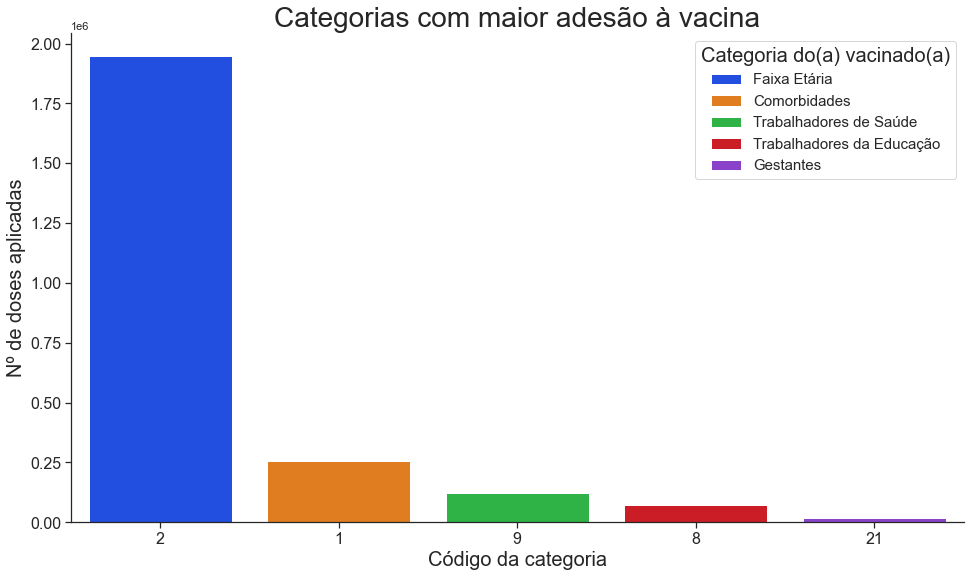

In [37]:
ax = sns.barplot(
    data = first5, x = 'cods_categoria', y = 'n_doses', dodge = False,
    order = first5.sort_values('n_doses', ascending = False).cods_categoria, hue = 'categoria', 
    hue_order = ['Faixa Etária', 'Comorbidades', 'Trabalhadores de Saúde', 'Trabalhadores da Educação', 'Gestantes'],
    palette = 'bright'
    )

ax.legend(
    loc='upper right', title = 'Categoria do(a) vacinado(a)',
    title_fontsize = 20, fontsize = 15
    )
    
ax.set_title('Categorias com maior adesão à vacina', fontsize = 28)
ax.set_xlabel('Código da categoria', fontsize = 20)
ax.set_ylabel('Nº de doses aplicadas', fontsize = 20)
ax.tick_params(labelsize = 16)
ax.figure.set_size_inches(16, 9)

É possível observar a discrepância entre a categoria `Faixa Etária` e as demais, isso ocorre devido ao fato de que a maioria da população paraibana tomou determinadas doses assim que a aplicação para sua idade foi liberada.

#### Plotagem do gráfico sem a categoria `Faixa Etária`

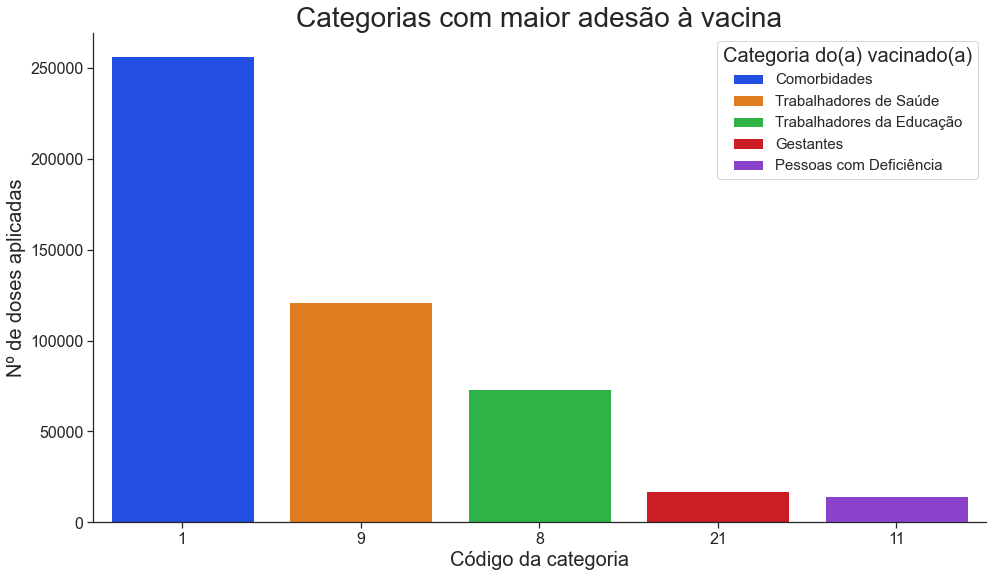

In [38]:
ax = sns.barplot(
    data = ranking_categoria[1:6], x = 'cods_categoria', y = 'n_doses', dodge = False,
    order = ranking_categoria[1:6].sort_values('n_doses', ascending = False).cods_categoria, hue = 'categoria', 
    hue_order = ['Comorbidades', 'Trabalhadores de Saúde', 'Trabalhadores da Educação', 'Gestantes', 'Pessoas com Deficiência'],
    palette = 'bright'
    )

ax.legend(
    loc='upper right', title = 'Categoria do(a) vacinado(a)',
    title_fontsize = 20, fontsize = 15
    )
    
ax.set_title('Categorias com maior adesão à vacina', fontsize = 28)
ax.set_xlabel('Código da categoria', fontsize = 20)
ax.set_ylabel('Nº de doses aplicadas', fontsize = 20)
ax.tick_params(labelsize = 16)
ax.figure.set_size_inches(16, 9)

Diferentemente do gráfico anterior, quando desconsidera-se a categoria `Faixa Etária`, tem-se uma distribuição um pouco mais igualitária. Sendo a categoria `Comorbidades` que ocupa a 1ª colocação com aproximadamente 250 mil doses aplicadas e `Pessoas com Deficiência` na 5ª colocação com volta de 25 mil doses.

#### Criação do ranking das primeiras 5 categorias com maior adesão

In [39]:
last5 = ranking_categoria[-5:]
last5

,cods_categoria,categoria,n_doses
15,114,Outros,1266
16,14,Funcionário do Sistema de Privação de Liberdade,647
17,12,Pessoas em Situação de Rua,622
18,13,Trabalhadores Portuários,507
19,4,Forças Armadas (membros ativos),410


#### Plotagem do gráfico 

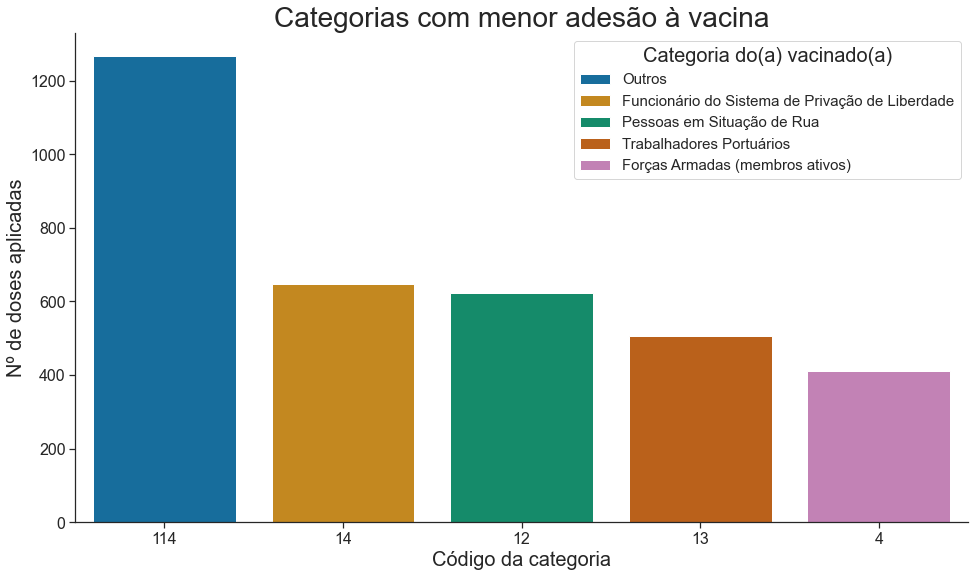

In [40]:
ax = sns.barplot(
    data = last5, x = 'cods_categoria', y = 'n_doses', dodge = False,
    order = last5.sort_values('n_doses', ascending = False).cods_categoria, hue = 'categoria',
    hue_order = ['Outros', 'Funcionário do Sistema de Privação de Liberdade', 'Pessoas em Situação de Rua',
    'Trabalhadores Portuários', 'Forças Armadas (membros ativos)'],
    palette = 'colorblind'
    )

ax.legend(
    loc = 'upper right', title = 'Categoria do(a) vacinado(a)',
    title_fontsize = 20, fontsize = 15
    )  

ax.set_title('Categorias com menor adesão à vacina', fontsize = 28)
ax.set_xlabel('Código da categoria', fontsize = 20)
ax.set_ylabel('Nº de doses aplicadas', fontsize = 20)
ax.tick_params(labelsize = 16)
ax.figure.set_size_inches(16, 9)


No final do ranking de categoria dos vacinados, encontra-se respectivamente uma pequena parte da população carcerária do estado, que estima-se ter 10 mil presos em 2021 segundo o [levantamento realizado pelo G1](https://g1.globo.com/pb/paraiba/noticia/2021/05/17/populacao-carceraria-reduz-mas-paraiba-ainda-registra-442percent-de-superlotacao-nos-presidios.ghtml), moradores de rua, trabalhadores portuários e ao final da lista os membros ativos das forças armadas que pouco passa de 400 doses aplicadas para esta última categoria.